In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [10]:
mean_01 = np.array([0.0,0.0])
cov_01 = np.array([[1.0,1.3], [1.3,1.5]])

data = np.random.multivariate_normal(mean_01,cov_01,800)
print data.shape

(800, 2)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


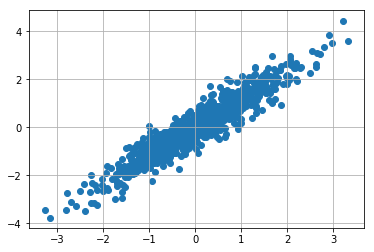

In [11]:
plt.figure(0)
plt.grid("on")
plt.scatter(data[:,0], data[:,1])
plt.show()

In [13]:
def pca(X, k=None):
    if k is None:
        k = X.shape[1]
    
    # covariance of X
    A = np.cov(X.T)  # assumes n as 1st dimension
    
    # eigenvalues and eigenvectors
    eg_val,eg_vec = np.linalg.eig(A)
    
    return eg_val,eg_vec   

In [14]:
lam, P = pca(data)
print lam.shape, P.shape

(2,) (2, 2)


In [15]:
print lam
print P

[0.07279544 2.63220865]
[[-0.77431808 -0.63279658]
 [ 0.63279658 -0.77431808]]


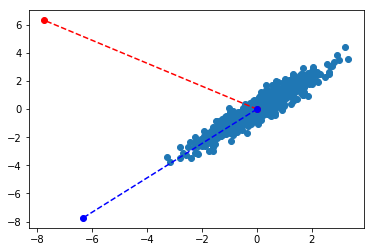

In [17]:
plt.figure(0)
plt.scatter(data[:,0],data[:,1])
# plt.plot([x1,x2],[y1,y2])
plt.plot([0,10*P[0,0]],[0,10*P[1,0]], 'ro--',)
plt.plot([0,10*P[0,1]],[0,10*P[1,1]], 'bo--')
plt.show()

In [21]:
# explained_variance along PC1
var_pc1 = lam[1]/(lam[0]+lam[1])
print var_pc1

0.9730886020767796


In [22]:
Z = data.dot(P)
print Z.shape

print Z[:10]


(800, 2)
[[-0.18295572 -2.50092566]
 [ 0.09394972 -1.46517776]
 [-0.26685485 -1.75113426]
 [ 0.11357052 -1.3530363 ]
 [ 0.21591508  1.32094955]
 [-0.17823656 -0.00720893]
 [ 0.4172049  -2.35069429]
 [-0.136479   -1.26203032]
 [ 0.12840334  1.18854423]
 [ 0.45777473 -0.71090588]]


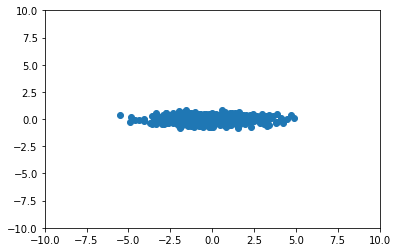

In [27]:
plt.figure(0)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(Z[:,1],Z[:,0]) # PC1 = ev2, PC2 = ev1
plt.show()

### PCA on MNIST

In [30]:
ds = pd.read_csv("./MNIST.csv")
data = ds.values[:2000,1:]
y = ds.values[:2000,0]
print np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([196, 217, 237, 173, 203, 187, 211, 194, 184, 198]))


In [31]:
print data.shape,y.shape

(2000, 784) (2000,)


In [32]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [33]:
eig_val,eig_vec = np.linalg.eig(A)
print eig_val.shape

(784,)


In [34]:
eig_list = []
for ix in range(eig_val.shape[0]):
    temp = [eig_val[ix],eig_vec[ix]]
    eig_list.append(temp)
    
print len(eig_list)

784


In [35]:
eig_list = sorted(eig_list, key=lambda x : x[0], reverse=True)

In [36]:
sorted_lamda = []
sorted_P = []

for ix in range(len(eig_list)):
    sorted_lamda.append(eig_list[ix][0])
    sorted_P.append(eig_list[ix][1])
    
sorted_lamda = np.asarray(sorted_lamda)
sorted_P = np.asarray(sorted_P)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


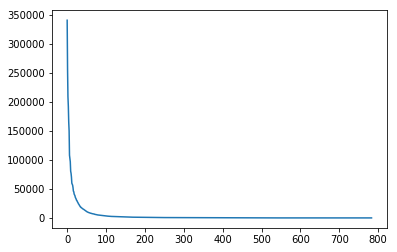

In [37]:
# plot of eigenvalues

plt.plot(sorted_lamda)

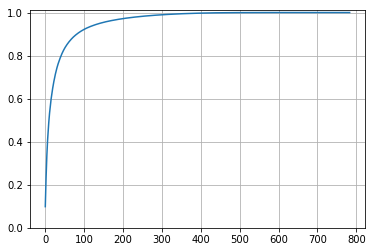

In [39]:
# explained variances
plt.figure(11)
plt.grid("on")
plt.ylim(0,1.01)
plt.plot(np.cumsum(sorted_lamda)/sorted_lamda.sum())
plt.show()

In [57]:
explained_variances = np.cumsum(sorted_lamda)/sorted_lamda.sum()
explained_variances[2]

(0.23249083093643036+6.3481191325114786e-37j)

In [48]:
Z = data.dot(sorted_P)
print data.shape

(2000, 784)


In [52]:
img_org = data[0].reshape((28,28))
img_reco = Z[0].astype(np.uint8).reshape((28,28))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


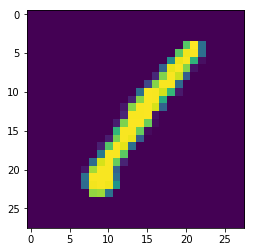

In [53]:
plt.imshow(img_org)

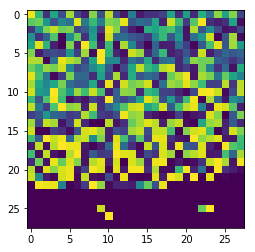

In [54]:
plt.imshow(img_reco)

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)

X_t = pca.fit_transform(data)
print X_t.shape

(2000, 2)


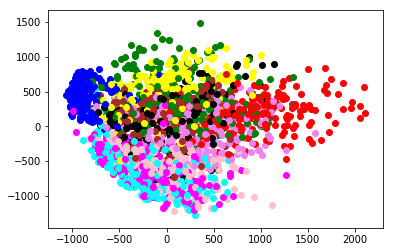

In [59]:
colors = ['red','blue','green','yellow','pink','black','violet','cyan','brown','magenta']
plt.figure()
for ix in range(X_t.shape[0]):
    plt.scatter(X_t[ix,0], X_t[ix,1], color= colors[y[ix]])
plt.show()